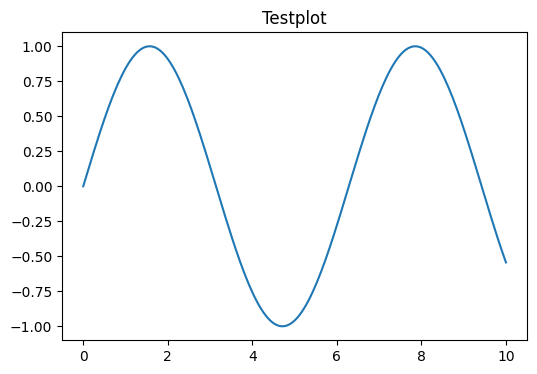

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
y = np.sin(x)
plt.figure(figsize=(6,4))
plt.plot(x, y)
plt.title("Testplot")
plt.show()


In [3]:
# notebooks/eda.ipynb

# --- Setup ---
import os, io, zipfile, json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [4]:
# --- 1. Daten laden ---
# DATA_DIR = "../data"
# ZIP_PATH = os.path.join(DATA_DIR, "archive.zip")  # ggf. anpassen
# DB_PATH = os.path.join(DATA_DIR, "hausverwaltung.db")  # deine DB

# print("ZIP existiert:", os.path.exists(ZIP_PATH), ZIP_PATH)
# print("DB Pfad:", DB_PATH)
# Passe den Pfad an, falls CSV anders heißt / woanders liegt
df = pd.read_csv("../data/immo_data.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()



Shape: (268850, 49)
Columns: ['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer', 'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount', 'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln', 'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date']


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [5]:
# --- 2. Grundlegende Infos ---
df.info()
df.describe(include="all").T



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
regio1,268850,16,Nordrhein_Westfalen,62863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serviceCharge,261941.0,NaN,NaN,NaN,151.206113,308.29579,0.0,95.0,135.0,190.0,146118.0
heatingType,223994,13,central_heating,128977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
telekomTvOffer,236231,3,ONE_YEAR_FREE,227632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
telekomHybridUploadSpeed,45020.0,NaN,NaN,NaN,10.0,0.0,10.0,10.0,10.0,10.0,10.0
newlyConst,268850,2,False,247679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balcony,268850,2,True,165734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
picturecount,268850.0,NaN,NaN,NaN,9.791958,6.408399,0.0,6.0,9.0,13.0,121.0
pricetrend,267018.0,NaN,NaN,NaN,3.389001,1.964874,-12.33,2.0,3.39,4.57,14.92
telekomUploadSpeed,235492.0,NaN,NaN,NaN,28.804928,16.337151,1.0,10.0,40.0,40.0,100.0


In [6]:
# --- 3. Fehlende Werte ---
missing = df.isna().mean().sort_values(ascending=False)
print("Missing values (in %):")
print(missing.head(15))



Missing values (in %):
telekomHybridUploadSpeed    0.832546
electricityBasePrice        0.825754
electricityKwhPrice         0.825754
energyEfficiencyClass       0.710668
lastRefurbish               0.699792
heatingCosts                0.681912
noParkSpaces                0.653889
petsAllowed                 0.426160
interiorQual                0.419063
thermalChar                 0.396154
numberOfFloors              0.363519
houseNumber                 0.264155
streetPlain                 0.264136
condition                   0.254748
yearConstructed             0.212182
dtype: float64


In [7]:
# --- 4. Plausibilitäts-Filter ---
# Beispiel: 
df_clean = df.copy()
df_clean = df_clean[
    (df_clean["livingSpace"] > 10) & (df_clean["livingSpace"] < 400) #&
    #(df_clean["price"] > 200) & (df_clean["price"] < 10000)
]

print("Nach Bereinigung:", df_clean.shape)



Nach Bereinigung: (268604, 49)


In [8]:
core = [
    "baseRent",          # Ziel: Nettokaltmiete
    "livingSpace",       # Fläche
    "noRooms",           # Zimmer
    "floor",             # Etage
    "yearConstructed",   # Baujahr
    "condition",         # Zustand
    "geo_plz",           # PLZ
    "regio3",            # Stadt/Ort
    "regio2"             # Kreis/Unterregion (als District)
]

missing_core = df[core].isna().mean().sort_values(ascending=False)
print("Missing (Kernspalten) in %:\n", (missing_core*100).round(1))


Missing (Kernspalten) in %:
 condition          25.5
yearConstructed    21.2
floor              19.1
baseRent            0.0
noRooms             0.0
livingSpace         0.0
geo_plz             0.0
regio3              0.0
regio2              0.0
dtype: float64


In [9]:
df1 = df.copy()

# Nur Zeilen mit Ziel & Fläche
df1 = df1[df1["baseRent"].notna() & df1["livingSpace"].notna()]

# Plausibilitäten (anpassen bei Bedarf)
df1 = df1[
    (df1["livingSpace"] > 10) & (df1["livingSpace"] < 400) &
    (df1["baseRent"]   > 200) & (df1["baseRent"]   < 10000)
].copy()

print("Nach Grundfilter:", df1.shape)


Nach Grundfilter: (261288, 49)


In [10]:
# Minimal-Standardisierung
clean = pd.DataFrame({
    "rent_cold":      pd.to_numeric(df1["baseRent"], errors="coerce"),
    "area_sqm":       pd.to_numeric(df1["livingSpace"], errors="coerce"),
    "rooms":          pd.to_numeric(df1["noRooms"], errors="coerce"),
    "floor":          pd.to_numeric(df1["floor"], errors="coerce"),
    "year_built":     pd.to_numeric(df1["yearConstructed"], errors="coerce"),
    "condition":      df1["condition"].astype("string").str.lower(),
    "zip_code":       df1["geo_plz"],
    "city":           df1["regio3"].fillna(df1["regio2"]),
    "district":       df1["regio2"],
    "created_at":     df1["date"]
})

print(clean.head(3))


   rent_cold  area_sqm  rooms  floor  year_built       condition  zip_code  \
0      595.0      86.0    4.0    1.0      1965.0       well_kept     44269   
1      800.0      89.0    3.0    NaN      1871.0     refurbished     67459   
2      965.0      83.8    3.0    3.0      2019.0  first_time_use      1097   

                         city           district created_at  
0                     Schüren           Dortmund      May19  
1              Böhl_Iggelheim  Rhein_Pfalz_Kreis      May19  
2  Äußere_Neustadt_Antonstadt            Dresden      Oct19  


Fehlende Werte gezielt behandeln (nur Kernfelder)

condition: fehlend → "unknown".

year_built: mit Median je Stadt auffüllen, Rest mit globalem Median.

floor: fehlend → 0 (Erdgeschoss als neutraler Default).

rooms: wenn fehlend (vermutlich selten) → Median je Stadt.

In [11]:
# condition
clean["condition"] = clean["condition"].fillna("unknown")

# year_built: Median pro Stadt
by_city_median_year = clean.groupby("city")["year_built"].transform("median")
clean["year_built"] = clean["year_built"].fillna(by_city_median_year)
clean["year_built"] = clean["year_built"].fillna(clean["year_built"].median())

# floor
clean["floor"] = clean["floor"].fillna(0)

# rooms
by_city_median_rooms = clean.groupby("city")["rooms"].transform("median")
clean["rooms"] = clean["rooms"].fillna(by_city_median_rooms)
clean["rooms"] = clean["rooms"].fillna(clean["rooms"].median())

# letzte Plausibilitäten
clean = clean[(clean["rooms"] > 0) & (clean["area_sqm"] > 10)]
print("Bereinigt:", clean.shape)


Bereinigt: (261288, 10)


        rent_cold  area_sqm  rooms  floor  year_built  \
142002      350.0      40.0    1.0    3.0      1960.0   
241885      510.0      87.0    3.0    1.0      1993.0   
83799      1270.0     101.0    4.0    1.0      2019.0   
222194     2460.0      98.0    2.0    5.0      1953.0   
244149      760.0      95.0    3.0    1.0      1905.0   

                                 condition             city  zip_code  
142002  first_time_use_after_refurbishment    Südostviertel     45139  
241885                     fully_renovated          Garding     25836  
83799                       first_time_use  Lindau_Bodensee     88131  
222194                          modernized               Au     81541  
244149  first_time_use_after_refurbishment           Barmen     42281  


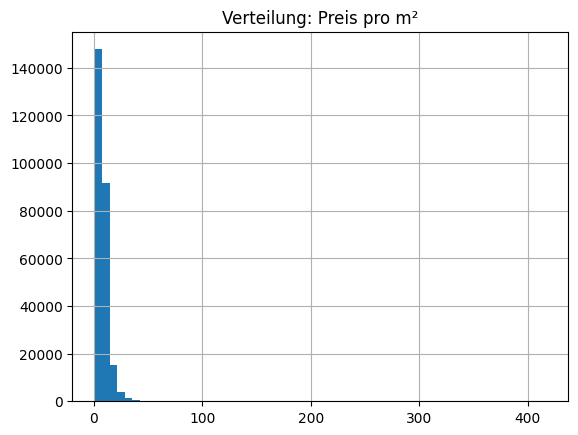

In [12]:
clean["price_per_sqm"] = clean["rent_cold"] / clean["area_sqm"]
clean["building_age"]  = 2025 - clean["year_built"]

print(clean[["rent_cold","area_sqm","rooms","floor","year_built","condition","city","zip_code"]].sample(5))

ax = clean["price_per_sqm"].dropna().hist(bins=60)
ax.set_title("Verteilung: Preis pro m²"); None


In [13]:
import sqlite3
con = sqlite3.connect("../data/hausverwaltung.db")
clean.to_sql("listings_raw", con, if_exists="replace", index=False)
con.close()
print(">> In SQLite geschrieben:", len(clean), "Zeilen (Tabelle 'listings_raw').")


>> In SQLite geschrieben: 261288 Zeilen (Tabelle 'listings_raw').
